##### 과제

###### 2. 유방암 데이터 - 차원축소(10, 5, 2 분류(앙상블) 정확도 측정), 군집화(2차원 축소 군집화 후 실제 데이터와 시각화)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [2]:
bc_std = StandardScaler().fit_transform(load_breast_cancer().data)

for n in [2, 5, 10]:
    pca = PCA(n_components=n)
    bc_pca = pca.fit_transform(bc_std)
    X_train, X_test, y_train, y_test = train_test_split(bc_pca, load_breast_cancer().target, random_state=2022) 
    xgc = XGBClassifier(random_state=2022)
    xgc.fit(X_train, y_train)
    explained = pca.explained_variance_ratio_.sum()
    acc = xgc.score(X_test, y_test)
    print(f'PCA_{n}\n설명력: {explained:.4f}\n정확도: {acc:.4f}')

PCA_2
설명력: 0.6324
정확도: 0.9371
PCA_5
설명력: 0.8473
정확도: 0.9580
PCA_10
설명력: 0.9516
정확도: 0.9790


In [3]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=2022)
kmeans.fit(bc_std)
bc_kmeans_df = pd.DataFrame({
    'PC1':bc_pca[:,0], 'PC2':bc_pca[:,1], 'cluster':kmeans.labels_,
    'target':load_breast_cancer().target
})

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


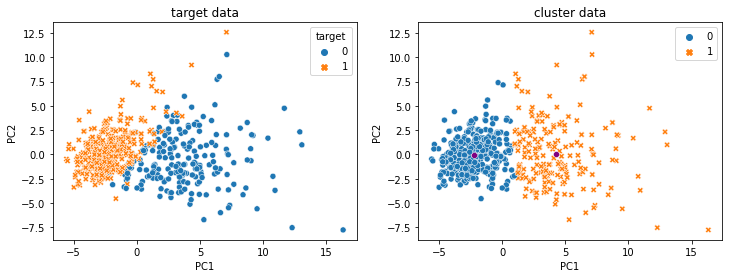

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
for k, columns in enumerate(['target','cluster']):
    plt.subplot(1,2, k+1)
    plt.title(columns+' data')
    sns.scatterplot('PC1','PC2', data=bc_kmeans_df, hue=columns, style=columns)
    if columns == 'cluster':
        sns.scatterplot(bc_kmeans_df.groupby(['cluster'])[['PC1','PC2']].mean()['PC1'],bc_kmeans_df.groupby(['cluster'])[['PC1','PC2']].mean()['PC2'], 
        data = bc_kmeans_df.groupby(['cluster'])[['PC1','PC2']].mean(), color='purple')
plt.show()